In [3]:
import numpy as np
import splinv
import matplotlib.pyplot as plt
from configparser import ConfigParser
from splinv.grid import Cartesian
from splinv import hmod
from astropy.io import fits

In [2]:
configName  =   'config_darkmapper.ini'
parser      =   ConfigParser()
parser.read(configName)

# halo simulation
z_h     =  0.2425
log_m   =  1
M_200   =  log_m ## very small mass to eliminate orginal shear field
conc    =  4
halo    =  splinv.hmod.triaxialJS02(mass=M_200,conc=conc,redshift=z_h,ra=0.,dec=0.,a_over_c = 1, a_over_b=1.0, tri_nfw = True)


In [3]:
Grid    =   Cartesian(parser)
lensKer1=   Grid.lensing_kernel(deltaIn=False)
general_grid    =  splinv.hmod.triaxialJS02_grid_mock(parser)

In [4]:
noisepix = general_grid.calc_noise(halo)

In [5]:
all_noise = np.zeros((100,10,128,128),dtype=np.complex64)

In [6]:
for i in range(100):
    all_noise[i,:,:,:] = general_grid.calc_noise(halo)

In [7]:
dg1 = all_noise.real
dg2 = all_noise.imag
noise_std = np.zeros((10,128,128))

In [11]:
for l in range(128):
    for m in range(128):
        for n in range(10):
            noise_std[n,l,m] = np.sqrt(np.std(dg1[:,n,l,m])**2 + np.std(dg2[:,n,l,m])**2)

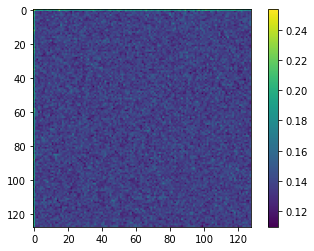

In [12]:
plt.imshow(noise_std[1])
plt.colorbar()

In [13]:
noise_std.shape

(10, 128, 128)

In [14]:
#str(np.prod((10,48,48)[1:]))

In [15]:
#str(np.prod(noise_std))
str((10,48,48)[1:][::-1])

'(48, 48)'

In [16]:

hdu1 = fits.PrimaryHDU(noise_std)
hdu1.writeto('noise_std128.fits')

In [15]:
# t = fits.BinTableHDU.from_columns([c1])
# t.writeto('noise_std2.fits', overwrite=True)

NameError: name 'c1' is not defined

In [4]:
file = fits.getdata('noise_std.fits')

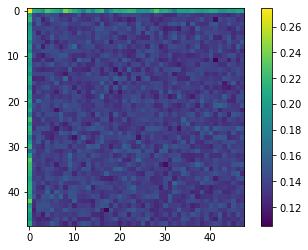

In [6]:
plt.imshow(file[3])
plt.colorbar()

In [8]:
noise_less_noise_std = np.ones_like(file)*0.05

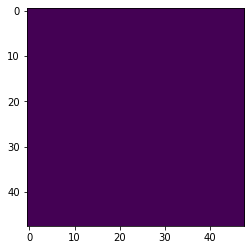

In [9]:
plt.imshow(noise_less_noise_std[3])

In [11]:
hdu1 = fits.PrimaryHDU(noise_less_noise_std)
hdu1.writeto('noiseless_noise_std.fits')